##__Agenda__##

- Multiclass Classification
  * Example with Online Gaming Behavior Dataset
  * Naive Bayes Algorithm
  * K-Nearest Neighbors
  * Decision Tree
  * Random Forest
- Multi-Label Classification
  * Examples of Multi-label classification



## __1. Multiclass Classification__

Multiclass classification is a type of classification task that involves classifying instances into one of three or more classes. Unlike binary classification, which deals with two classes, multiclass classification can handle problems where an instance can belong to multiple categories.

**Example:** A tree can be classified as a banyan tree, a palm tree, a pine tree, or an oak tree.

Some of the popular algorithms used for multi-class classification are:

- Naive Bayes
- K-Nearest Neighbors
- Decision Trees
- Random Forest

Lets take a multiclass problem where we can address all the Multiclass algorithms and will see the clear cut difference in the model performance:

## __1.1 **Example** with Online Gaming Behavior Dataset:__

The **Online Gaming Behavior** dataset on Kaggle is designed to analyze and predict players' behaviors in online gaming. It includes data on various aspects such as player identification, session duration, in-game actions, and purchases. The dataset comprises several features that capture player activities and interactions within the game environment, providing a rich source of information for developing predictive models. This data can be leveraged to understand player engagement, forecast future behavior, and tailor strategies to enhance user experience and retention.

**Number of Instances:** 40034

**Number of Attributes:** 13

**Attribute Information:**

- **PlayerID:** Unique identifier for each player.
- **Age:** Age of the player.
- **Gender:** Gender of the player.
- **Location:** Geographic location of the player.
- **GameGenre:** Genre of the game the player is engaged in.
- **PlayTimeHours:** Average hours spent playing per session.
- **InGamePurchases:** Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).
- **GameDifficulty:** Difficulty level of the game.
- **SessionsPerWeek:** Number of gaming sessions per week.
- **AvgSessionDurationMinutes:** Average duration of each gaming session in minutes.
- **PlayerLevel:** Current level of the player in the game.
- **AchievementsUnlocked:** Number of achievements unlocked by the player.

**Target Variable**
- **EngagementLevel:** Categorized engagement level reflecting player retention (Medium, High, and Low).



**Note:** We will use this dataset to explore and compare various multiclass algorithms, examining how their performance varies depending on the type and implementation of each algorithm.

Let's first start with the implementation of **Naive Bayes**, but make sure to conduct proper data preprocessing to make it suitable for modeling.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from itertools import cycle


In [4]:
# Load the Online Gamin Behavior dataset
df = pd.read_csv(r"C:\Users\jim\Downloads\Machine_Learning_ILT_Materials\0.2_LVC\0.3_Datasets\Lesson_04_Supervised_Learning_ Classification_and_its_Application\online_gaming_behavior_dataset.csv")

# Display the first few rows of the dataset
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [5]:
df.shape

(40034, 13)

In [7]:
# Checking for missing values
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [8]:
# Statistical summary of the dataset
df.describe()


,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [9]:
# Distribution of the target variable
df['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [10]:
target_column = 'EngagementLevel'
X = df.drop(columns=[target_column])
y = df[target_column]

In [11]:
# Convert categorical string variables to numerical values
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Create dummies for other categorical variables if any
X = pd.get_dummies(X, drop_first=True)

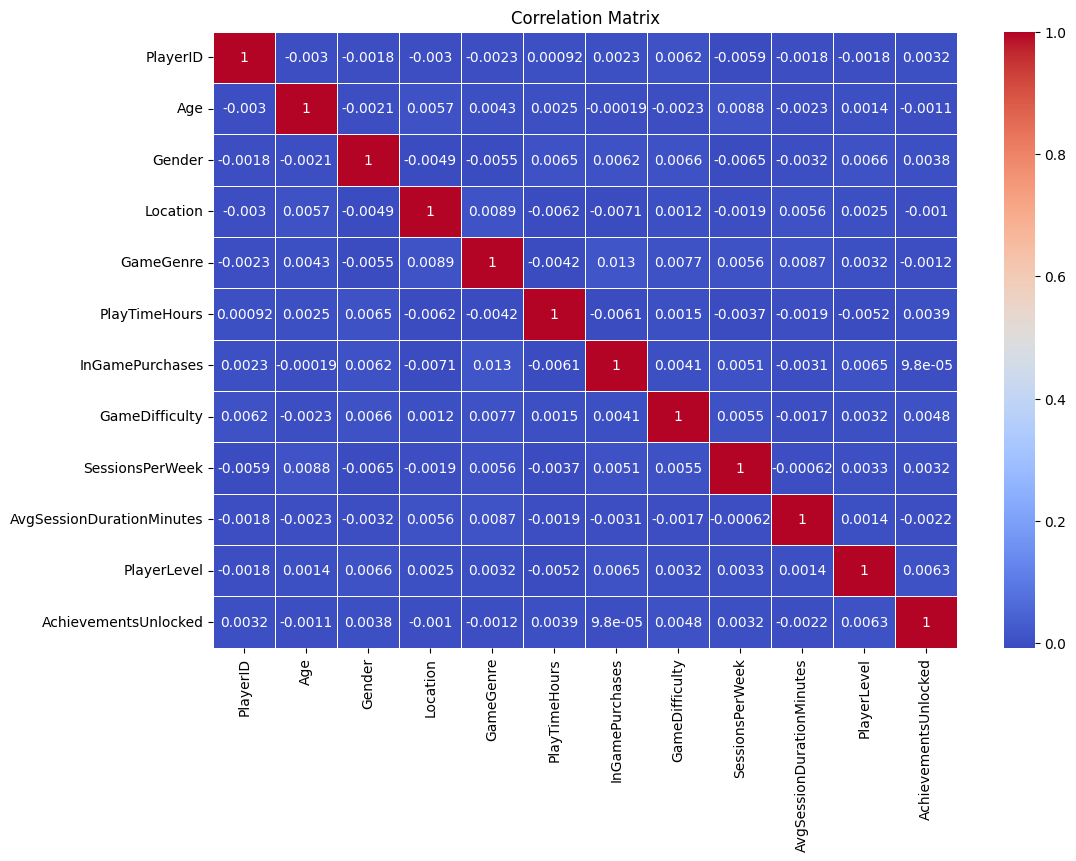

In [ ]:
# Heatmap of the correlation matrix using seaborn library
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [13]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## __1.2 Applying Naive Bayes Algorithm on Online Gaming Behavior dataset__

In [14]:
# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_nb = nb_model.predict(X_test_sc)
y_pred_prob_nb = nb_model.predict_proba(X_test_sc)

In [15]:
# Determine the class order
class_order = nb_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_nb,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_nb[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()


Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.22,0.07,0.71
22227,Medium,Medium,0.19,0.17,0.64
24899,Medium,Medium,0.01,0.34,0.65
35415,Medium,Medium,0.22,0.16,0.62
21440,Medium,Medium,0.34,0.13,0.53


In [16]:
print("\nNaive Bayes Classifier:")
training_accuracy =  accuracy_score(y_train, nb_model.predict(X_train_sc))
testing_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Naive Bayes Classifier:
Training Accuracy: 0.8447960033305578
Testing Accuracy: 0.8434494817035094


In [17]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb, labels=class_order)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_order, columns=class_order)
print("Confusion Matrix with Class Labels:")
print(conf_matrix_df)


Confusion Matrix:
[[3234  109  814]
 [  96 2854 1133]
 [ 129  226 7419]]
Confusion Matrix with Class Labels:
        High   Low  Medium
High    3234   109     814
Low       96  2854    1133
Medium   129   226    7419


#### __Observation__

The confusion matrix is a 3x3 matrix because it is a multiclass classification problem with three classes (Medium, High, Low).

**High:**

This class has a relatively high number of true positives (3234), but also a considerable number of false negatives, indicating that some instances misclassified as Low and medium

**Low:**

This class has a moderate number of true positives (2854), but a higher number of false negatives, indicating frequent misclassification of `low` instances as `high` or `medium`.

**Medium:**

This class has a very high number of true positives (7419), indicating the model is very good at correctly identifying `medium` instances.

In [18]:
# Print classification report
Class_report = classification_report(y_test, y_pred_nb)
print("Naïve Bayes Classification Report:")
print(Class_report)

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.78      0.85      4157
         Low       0.89      0.70      0.78      4083
      Medium       0.79      0.95      0.87      7774

    accuracy                           0.84     16014
   macro avg       0.87      0.81      0.83     16014
weighted avg       0.86      0.84      0.84     16014



- `label_binarize` is a function from Scikit-Learn that is used to convert class labels into a binary format suitable for certain types of classifiers and evaluation metrics.
- This is particularly useful when you need to handle multiclass problems with methods that are inherently designed for binary classification, such as calculating ROC curves and AUC scores.

Plot the ROC curve for each class separately in a multiclass setting.

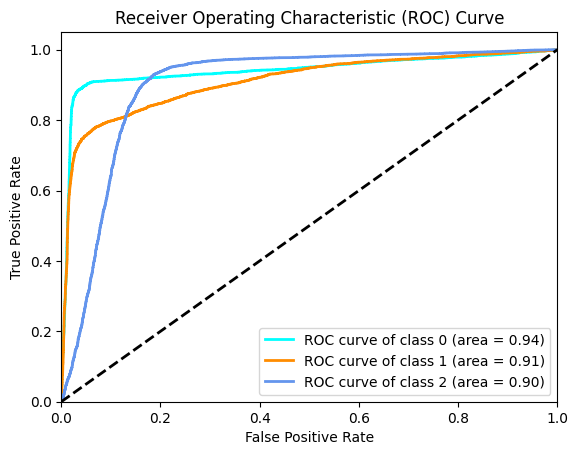

In [19]:
# Check if more than one class is present in y_test
if len(set(y_test)) > 1:
    # Plot ROC curve
    y_test_binarized = label_binarize(y_test, classes=nb_model.classes_)
    n_classes = y_test_binarized.shape[1]

    y_score = nb_model.predict_proba(X_test_sc)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

    # Plotting the ROC curves
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC AUC score is not defined as only one class is present in y_true.")

#### __Observation__

1. Class 0/High: The model performs very well in classifying instances of Class 0. An AUC of 0.94 indicates that there is a 94% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance for Class 0.

2. Class 1/Low: The model has excellent performance for Class 1, with an AUC of 0.91. This means the model has a 91% chance of correctly distinguishing between a positive instance and a negative instance for Class 1.

3. Class 2/Medium: The model performs very well for Class 2, with an AUC of 0.90. This indicates a 90% chance of the model correctly distinguishing between a positive instance and a negative instance for Class 2.

Diagonal Line (Black dashed line):

The diagonal line represents random guessing, with an AUC of 0.5. Any ROC curve below this line indicates worse than random performance, while curves above this line indicate better than random performance.

**Key Observations:**

The Naive Bayes performs exceptionally well for all classes, with AUC values ranging from 0.90 to 0.94. The model is best at classifying instances of Class 0, followed closely by Class 1, and then Class 2.



## __1.3 Applying K-Nearest Neighbors on Online Gaming Behavior Dataset__

In [20]:
#Import Required Libraries and apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_knn = knn_model.predict(X_test_sc)
y_pred_prob_knn = knn_model.predict_proba(X_test_sc)

In [21]:
# Determine the class order
class_order = knn_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_knn,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_knn[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.00,0.00,1.00
22227,Medium,High,0.67,0.00,0.33
24899,Medium,Low,0.00,0.67,0.33
35415,Medium,Medium,0.33,0.00,0.67
21440,Medium,Medium,0.33,0.00,0.67


In [22]:
# Calculate training and testing accuracy
print("\nK-Nearest Neighbors Classification")
training_accuracy =  accuracy_score(y_train, knn_model.predict(X_train_sc))
testing_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


K-Nearest Neighbors Classification
Training Accuracy: 0.8572855953372189
Testing Accuracy: 0.7141875858623704


In [23]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn, labels=class_order)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_order, columns=class_order)
print("Confusion Matrix with Class Labels:")
print(conf_matrix_df)


Confusion Matrix:
[[3049  132  976]
 [ 255 2360 1468]
 [ 975  771 6028]]
Confusion Matrix with Class Labels:
        High   Low  Medium
High    3049   132     976
Low      255  2360    1468
Medium   975   771    6028


#### __Observation__

**High:**

This class has a moderate number of true positives (3049), but also a significant number of false negatives, indicating that many `high` instances are misclassified as `medium` or `low`.

**Low:**

This class has a lower number of true positives (2360) and a high number of false negatives, indicating frequent misclassification of `Low` instances as `medium` or `high`.

**Medium:**

This class has a high number of true positives (6028), indicating the model is relatively good at identifying `Medium` instances. However, there is still a considerable number of false negatives.

In [24]:
# Print classification report
Class_report = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Classification Report:")
print(Class_report)

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.73      0.72      4157
         Low       0.72      0.58      0.64      4083
      Medium       0.71      0.78      0.74      7774

    accuracy                           0.71     16014
   macro avg       0.72      0.70      0.70     16014
weighted avg       0.71      0.71      0.71     16014



Plot the ROC curve for each class separately in a multiclass setting.

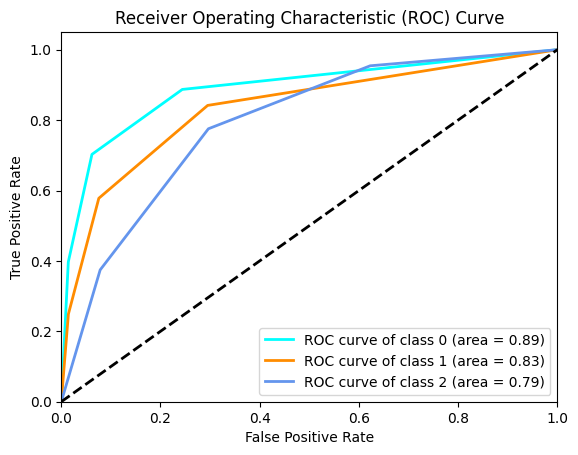

In [25]:
# Check if more than one class is present in y_test
if len(set(y_test)) > 1:
    # Plot ROC curve
    y_test_binarized = label_binarize(y_test, classes=knn_model.classes_)
    n_classes = y_test_binarized.shape[1]

    y_score = knn_model.predict_proba(X_test_sc)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

    # Plotting the ROC curves
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC AUC score is not defined as only one class is present in y_true.")

#### __Observation__

**Class 0 (Cyan Line)**

Area Under the Curve (AUC): 0.89

The model performs well in classifying instances of Class 0/Medium. An AUC of 0.89 indicates that there is an 89% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance for Class 0.

**Class 1 (Orange Line)**

Area Under the Curve (AUC): 0.83

The model has good performance for Class 1, with an AUC of 0.83. This means the model has an 83% chance of correctly distinguishing between a positive instance and a negative instance for Class 1.

**Class 2 (Blue Line)**

Area Under the Curve (AUC): 0.79

The model performs moderately well for Class 2, with an AUC of 0.79. This indicates a 79% chance of the model correctly distinguishing between a positive instance and a negative instance for Class 2.

**Key Observation:**

- The k-NN classifier performs reasonably well for all classes, with AUC values ranging from 0.79 to 0.89.
- If the dataset has imbalanced classes (i.e., some classes have significantly more instances than others), this could affect the performance of the model and the ROC curves. It's essential to consider class distribution when interpreting these results.

## __1.4 Applying Decision Tree on Online Gaming Behavior Dataset__


In [26]:
#Import Required Libraries and apply decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_dt = dt_model.predict(X_test_sc)
y_pred_prob_dt = dt_model.predict_proba(X_test_sc)

In [27]:
# Determine the class order
class_order = dt_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_dt,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_dt[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.0,0.0,1.0
22227,Medium,Medium,0.0,0.0,1.0
24899,Medium,High,1.0,0.0,0.0
35415,Medium,Medium,0.0,0.0,1.0
21440,Medium,Medium,0.0,0.0,1.0


In [28]:
## Calculate training and testing accuracy
print("\nDecision Tree Classifier:")
training_accuracy =  accuracy_score(y_train, dt_model.predict(X_train_sc))
testing_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Decision Tree Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8285250405894842


#### __Observation__

- The high training accuracy combined with the slightly lower testing accuracy typically points towards an overfitting scenario.

- In practice, this might mean that the decision tree has complex branches that perfectly classify the training data but slightly miss when predicting new, unseen data.

- Adjustments such as pruning the tree, setting a maximum depth, or increasing the minimum samples required for a node split might help in reducing overfitting and improving the model's generalization.

- Decision trees are prone to overfitting, especially with complex datasets having many features and deep trees. -

- Cross-validation helps in checking whether the model just memorizes the training data or if it generalizes well over unseen data.

In [29]:
# Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X_train_sc, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.83180683 0.82618651 0.83409659 0.82847627 0.82285595]
Mean cross-validation score: 0.828684429641965



**Cross-Validation Scores:**

 Cross-validation scores vary slightly but generally remain high, with a mean cross-validation score of 0.82. This indicates good model performance and stability.

In [30]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt, labels=class_order)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_order, columns=class_order)
print("Confusion Matrix with Class Labels:")
print(conf_matrix_df)

Confusion Matrix:
[[3362  285  510]
 [ 290 3275  518]
 [ 559  584 6631]]
Confusion Matrix with Class Labels:
        High   Low  Medium
High    3362   285     510
Low      290  3275     518
Medium   559   584    6631


In [31]:
# Print classification report
Class_report = classification_report(y_test, y_pred_dt)
print("Decision Trees Classification Report:")
print(Class_report)

Decision Trees Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.81      0.80      4157
         Low       0.79      0.80      0.80      4083
      Medium       0.87      0.85      0.86      7774

    accuracy                           0.83     16014
   macro avg       0.82      0.82      0.82     16014
weighted avg       0.83      0.83      0.83     16014



The confusion matrix and classification report show that while the model performs well overall, there are some misclassifications

## __1.5 Random Forest__

To address the limitations observed with the Decision Tree, we can transition to using a Random Forest model. Random Forest, as an ensemble method, builds multiple decision trees and combines their predictions to improve performance and reduce overfitting.

### __Benefits of Random Forest:__

**Reduces Overfitting:** Averaging the results of multiple decision trees reduces the risk of overfitting seen with a single Decision Tree.

**Improves Generalization:** The combined predictions from multiple trees enhance the model’s ability to generalize to new, unseen data.

**More Robust Predictions:** Random Forest is more robust to noise and variability in the training data.

In [32]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sc, y_train)

# Predict on testing set
y_pred_rf = rf_model.predict(X_test_sc)
y_pred_prob_rf = rf_model.predict_proba(X_test_sc)

In [33]:
# Determine the class order
class_order = rf_model.classes_
print("Class order:", class_order)

# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_rf,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_prob_rf[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

Class order: ['High' 'Low' 'Medium']


,Actual Label,Predicted Label,Predicted Probability High,Predicted Probability Low,Predicted Probability Medium
34667,Medium,Medium,0.08,0.05,0.87
22227,Medium,Medium,0.08,0.04,0.88
24899,Medium,Low,0.06,0.79,0.15
35415,Medium,Medium,0.13,0.06,0.81
21440,Medium,Medium,0.17,0.07,0.76


In [34]:
## Calculate training and testing accuracy
print("\nRandom Forest Classifier:")
training_accuracy =  accuracy_score(y_train, rf_model.predict(X_train_sc))
testing_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Random Forest Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.9098288997127514


In [35]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf, labels=class_order)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix with labels
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_order, columns=class_order)
print("Confusion Matrix with Class Labels:")
print(conf_matrix_df)

Confusion Matrix:
[[3612  131  414]
 [ 114 3584  385]
 [ 176  224 7374]]
Confusion Matrix with Class Labels:
        High   Low  Medium
High    3612   131     414
Low      114  3584     385
Medium   176   224    7374


In [36]:
# Print classification report
Class_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(Class_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.87      0.90      4157
         Low       0.91      0.88      0.89      4083
      Medium       0.90      0.95      0.92      7774

    accuracy                           0.91     16014
   macro avg       0.91      0.90      0.90     16014
weighted avg       0.91      0.91      0.91     16014



### __Observation:__

- The Random Forest model shows perfect accuracy on both the training and testing sets, indicating that it has classified all instances correctly.

- The confusion matrix for the Random Forest model shows perfect classification for all classes, with less misclassifications. The Decision Tree had a few misclassifications, particularly one misclassified instance in Medium and Low.

- Given the perfect performance of the Random Forest model on this dataset, further hyperparameter tuning might not be necessary. However, for more complex datasets, hyperparameter tuning could further optimize the model's performance.

## __2. Multi-Label Classification__

It allows us to classify datasets with more than one target variable. There are several labels for the outputs of a given prediction, and when making predictions, a given input may belong to more than one label.





## __2.1 Examples__
#### __1. Text Categorization__
**Example:** News Article Classification

**Scenario:** A news article might belong to multiple categories such as politics, economy, and health.

**Implementation:** Using multilabel classification, the classifier can assign multiple labels to each news article indicating the categories it belongs to.

#### __2. Image Tagging__
**Example:** Automatic Tagging of Images on Social Media

**Scenario:** An image can contain multiple objects such as people, cars, trees, etc.

**Implementation:** A multilabel classifier can predict all the objects present in an image, thus tagging it with multiple labels.

#### __3. Medical Diagnosis__
**Example:** Predicting Multiple Diseases

**Scenario:** A patient might have multiple co-existing conditions, such as diabetes, hypertension, and heart disease.

**Implementation:** A multilabel classifier can be trained to predict all the diseases a patient might have based on their medical records and test results.

#### __4. Music Genre Classification__
**Example:** Categorizing Songs by Genres

**Scenario:** A single song might belong to multiple genres such as rock, blues, and jazz.

**Implementation:** Using multilabel classification, the classifier can tag each song with all relevant genres.

#### __5. Tagging Questions in Q&A Platforms__
**Example:** Tagging Questions on Stack Overflow

**Scenario:** A single question might relate to multiple topics such as Python, data science, and machine learning.

**Implementation:** A multilabel classifier can automatically assign all relevant tags to each question posted on the platform.

Below are additional resources/research papers to learn more about Multi-label classification:
 1. [Deep Learning for Multi-Label Learning: A Comprehensive Survey](https://arxiv.org/abs/2401.16549)
 2. [Comprehensive Comparative Study of Multi-Label Classification Methods](https://arxiv.org/abs/2102.07113)
 3. [MlTr: Multi-label Classification with Transformer](https://arxiv.org/abs/2106.06195)


## __Conclusion:__

Classification techniques are integral to understanding and predicting categorical outcomes based on features. In this comprehensive exploration, you've delved deep into the realms of multiclass and multilabel classification, employing datasets such as the Online Gaming Behavior dataset to anchor your learning in real-world contexts.

You've become familiar with essential classification algorithms including Naive Bayes, K-Nearest Neighbors, Decision Trees, and Random Forests, observing their application across different scenarios. You've also learned how to measure the efficacy of these models using metrics like accuracy, confusion matrices, and ROC curves, ensuring you understand model performance evaluation comprehensively.

Furthermore, the notebook expanded your knowledge to multilabel classification, revealing the complexities when instances belong to multiple categories simultaneously.

Conclusively, this lesson has not only covered the theoretical aspects of classification but also provided you with practical skills and insights necessary for applying these techniques to complex datasets, enhancing both your analytical capabilities and your readiness to tackle advanced classification problems in diverse fields.